<p><img src="https://assets.datacamp.com/production/project_646/img/blood_donation.png" style="float: right;" alt="A pictogram of a blood bag with blood donation written in it" width="200"></p>
<p>Blood transfusion saves lives - from replacing lost blood during major surgery or a serious injury to treating various illnesses and blood disorders. Ensuring that there's enough blood in supply whenever needed is a serious challenge for the health professionals. According to <a href="https://www.webmd.com/a-to-z-guides/blood-transfusion-what-to-know#1">WebMD</a>, "about 5 million Americans need a blood transfusion every year".</p>
<p>Our dataset is from a mobile blood donation vehicle in Taiwan. The Blood Transfusion Service Center drives to different universities and collects blood as part of a blood drive. We want to predict whether or not a donor will give blood the next time the vehicle comes to campus.</p>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("transfusion.data")

In [3]:
data.head()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
0,2,50,12500,98,1
1,0,13,3250,28,1
2,1,16,4000,35,1
3,2,20,5000,45,1
4,1,24,6000,77,0


<p>Let's briefly return to our discussion of RFM model. RFM stands for Recency, Frequency and Monetary Value and it is commonly used in marketing for identifying your best customers. In our case, our customers are blood donors.</p>
<p>RFMTC is a variation of the RFM model. Below is a description of what each column means in our dataset:</p>
<ul>
<li>R (Recency - months since the last donation)</li>
<li>F (Frequency - total number of donation)</li>
<li>M (Monetary - total blood donated in c.c.)</li>
<li>T (Time - months since the first donation)</li>
<li>a binary variable representing whether he/she donated blood in March 2007 (1 stands for donating blood; 0 stands for not donating blood)</li>
</ul>
<p>It looks like every column in our DataFrame has the numeric type, which is exactly what we want when building a machine learning model. Let's verify our hypothesis.</p>

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 748 entries, 0 to 747
Data columns (total 5 columns):
Recency (months)                              748 non-null int64
Frequency (times)                             748 non-null int64
Monetary (c.c. blood)                         748 non-null int64
Time (months)                                 748 non-null int64
whether he/she donated blood in March 2007    748 non-null int64
dtypes: int64(5)
memory usage: 29.3 KB


In [5]:
data.shape

(748, 5)

In [6]:
data.describe()

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months),whether he/she donated blood in March 2007
count,748.000000,748.000000,748.000000,748.000000,748.000000
mean,9.506684,5.514706,1378.676471,34.282086,0.237968
std,8.095396,5.839307,1459.826781,24.376714,0.426124
min,0.000000,1.000000,250.000000,2.000000,0.000000
25%,2.750000,2.000000,500.000000,16.000000,0.000000
50%,7.000000,4.000000,1000.000000,28.000000,0.000000
75%,14.000000,7.000000,1750.000000,50.000000,0.000000
max,74.000000,50.000000,12500.000000,98.000000,1.000000


In [59]:
data['whether he/she donated blood in March 2007'].value_counts(normalize=True)

0    0.762032
1    0.237968
Name: whether he/she donated blood in March 2007, dtype: float64

In [7]:
target = data.iloc[:,-1].value_counts()

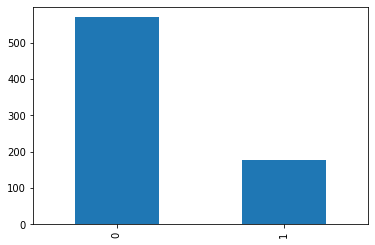

In [8]:
target.plot(kind="bar")

In [9]:
categorical_features = data.select_dtypes(exclude=np.number)

In [10]:
numerical_features = data.select_dtypes(include=np.number)

In [11]:
Numerical_features = numerical_features.iloc[:,:4]

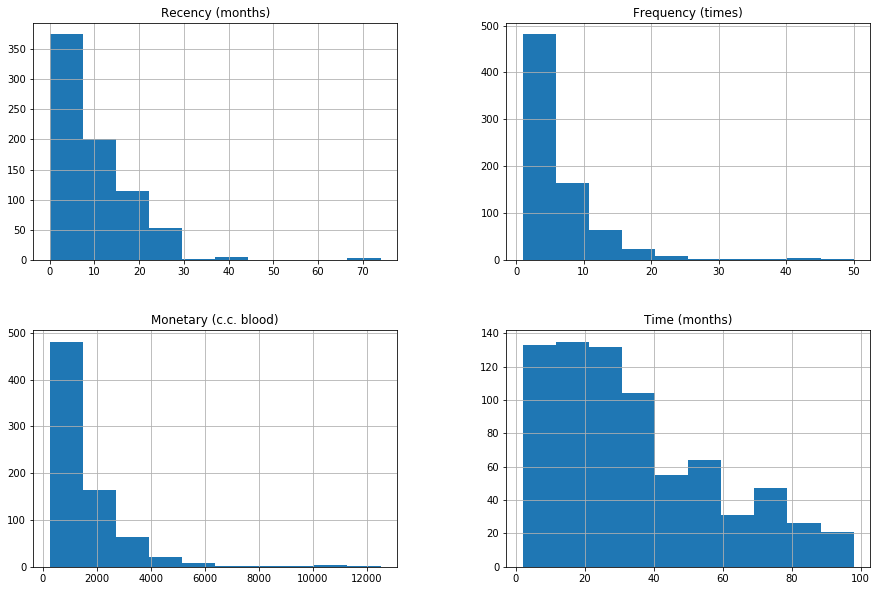

In [12]:
fig,axes = plt.subplots(2,2,figsize=(15,10))
m=0
for i in range(0,2):
    for j in range(0,2):
        data.hist(column = Numerical_features.columns[m],ax=axes[i,j])
        m+=1

In [13]:
columns = data.columns.tolist()

In [14]:
independent_features = [c for c in columns if c not in ["whether he/she donated blood in March 2007"]]

In [15]:
X = data[independent_features]

In [16]:
X

,Recency (months),Frequency (times),Monetary (c.c. blood),Time (months)
0,2,50,12500,98
1,0,13,3250,28
2,1,16,4000,35
3,2,20,5000,45
4,1,24,6000,77
...,...,...,...,...
743,23,2,500,38
744,21,2,500,52
745,23,3,750,62
746,39,1,250,39


In [17]:
y = data.iloc[:,-1]

In [18]:
y

0      1
1      1
2      1
3      1
4      0
      ..
743    0
744    0
745    0
746    0
747    0
Name: whether he/she donated blood in March 2007, Length: 748, dtype: int64

In [19]:
donated = data[data["whether he/she donated blood in March 2007"] == 1]

No_donation = data[data["whether he/she donated blood in March 2007"]==0]

In [20]:
donated.shape,No_donation.shape

((178, 5), (570, 5))

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,random_state=42,test_size=0.3)

In [22]:
from collections import Counter

In [23]:
Counter(y_train)

Counter({1: 118, 0: 405})

In [32]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [25]:
log_class = LogisticRegression()
grid = {"C":np.linspace(0,0.5,num=100),'penalty':['l1','l2']}
cv = KFold(n_splits=5,random_state=None,shuffle=False)

In [26]:
clf = GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(X_train,y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([0.        , 0.00505051, 0.01010101, 0.01515152, 0.02020202,
       0.02525253, 0.03030303, 0.03535354, 0.04040404, 0.04545455,
       0.05050505, 0.05555556, 0.06060606, 0.06565657, 0.07070707,
       0.07575758, 0.08080808, 0.08585859, 0.09090909, 0.0959596 ,
       0.1010101...
       0.35353535, 0.35858586, 0.36363636, 0.36868687, 0.37373737,
       0.37878788, 0.38383838, 0.38888889, 0.39393939, 0.3989899 ,
       0.4040404 , 0.40909091, 0.41414141, 0.41919192, 0.42424242,
       0.42929293, 0.43434343, 0.43939394, 0.44444444, 0.44949495,
       0.45454545, 0.45959596, 0.46464646, 0.46969697, 0.47474747,
       0.47979798, 0.48484848, 0.48989899, 0.49494949, 0.5       ]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [27]:
y_pred = clf.predict(X_test)
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[161   4]
 [ 55   5]]
0.7377777777777778
              precision    recall  f1-score   support

           0       0.75      0.98      0.85       165
           1       0.56      0.08      0.14        60

    accuracy                           0.74       225
   macro avg       0.65      0.53      0.50       225
weighted avg       0.69      0.74      0.66       225



In [28]:
clf.best_params_

{'C': 0.005050505050505051, 'penalty': 'l2'}

In [29]:
from sklearn.metrics import plot_confusion_matrix

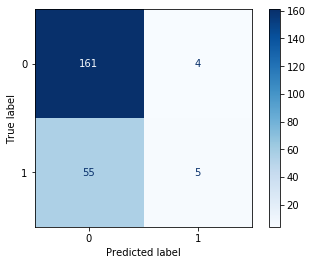

In [30]:
disp = plot_confusion_matrix(clf, X_test, y_test,cmap=plt.cm.Blues)
plt.show()

## Applying vanilla random forest model

In [33]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
ytrain_pred = rf_model.predict_proba(X_train)
print('RF train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = rf_model.predict_proba(X_test)
print('RF test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

RF train roc-auc: 0.9772128060263653
RF test roc-auc: 0.6498989898989899


## Applying vanilla logistic regression model

In [42]:
log_classifier=LogisticRegression()
log_classifier.fit(X_train, y_train)
ytrain_pred = log_classifier.predict_proba(X_train)
print('Logistic train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = log_classifier.predict_proba(X_test)
print('Logistic test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Logistic train roc-auc: 0.7513705796191672
Logistic test roc-auc: 0.7579292929292929


## Adaboost classifier

In [43]:
from sklearn.ensemble import AdaBoostClassifier
ada_classifier=AdaBoostClassifier()
ada_classifier.fit(X_train, y_train)
ytrain_pred = ada_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = ada_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.8311780707260933
Adaboost test roc-auc: 0.7355050505050504


## KNN

In [44]:
from sklearn.neighbors import KNeighborsClassifier
knn_classifier=KNeighborsClassifier()
knn_classifier.fit(X_train, y_train)
ytrain_pred = knn_classifier.predict_proba(X_train)
print('Adaboost train roc-auc: {}'.format(roc_auc_score(y_train, ytrain_pred[:,1])))
ytest_pred = knn_classifier.predict_proba(X_test)
print('Adaboost test roc-auc: {}'.format(roc_auc_score(y_test, ytest_pred[:,1])))

Adaboost train roc-auc: 0.8403431680267839
Adaboost test roc-auc: 0.6626767676767678


### Now we focus on selecting best threshold for best accuracy

In [49]:
pred=[]
for model in [rf_model,log_classifier,ada_classifier,knn_classifier]:
    pred.append(pd.Series(model.predict_proba(X_test)[:,1]))
final_prediction=pd.concat(pred,axis=1).mean(axis=1)
print('Ensemble test roc-auc: {}'.format(roc_auc_score(y_test,final_prediction)))

Ensemble test roc-auc: 0.703989898989899


In [51]:
#### Calculate the ROc Curve


fpr, tpr, thresholds = roc_curve(y_test, final_prediction)
thresholds


array([1.66664269, 0.66664269, 0.66640751, 0.65376017, 0.6472771 ,
       0.62378069, 0.61127391, 0.59760997, 0.5918429 , 0.54511562,
       0.50945733, 0.49054328, 0.46581924, 0.46430944, 0.46140812,
       0.45950338, 0.45397149, 0.44790971, 0.43925653, 0.42870827,
       0.41976579, 0.41831412, 0.41693305, 0.40433252, 0.3906492 ,
       0.39063219, 0.37546018, 0.36789419, 0.36309372, 0.35591765,
       0.35110777, 0.34773886, 0.34414992, 0.32509266, 0.32278275,
       0.31984085, 0.31801281, 0.31153933, 0.30687262, 0.29286688,
       0.29182394, 0.2887849 , 0.28875694, 0.28571634, 0.28422699,
       0.28011781, 0.27855065, 0.27714561, 0.2665735 , 0.26296367,
       0.26254042, 0.25770572, 0.25340148, 0.25128044, 0.2472746 ,
       0.2437187 , 0.21770445, 0.21610598, 0.21223572, 0.21048027,
       0.2078155 , 0.20581449, 0.20570042, 0.2050038 , 0.20445208,
       0.20315819, 0.20110078, 0.19685811, 0.19599345, 0.19590684,
       0.19373679, 0.18652889, 0.18643379, 0.18239942, 0.17445

In [53]:
from sklearn.metrics import accuracy_score
accuracy_ls = []

for thresh in thresholds:
    y_pred = np.where(final_prediction > thresh,1,0)
    accuracy_ls.append(accuracy_score(y_test,y_pred,normalize=True))
    
accuracy_ls = pd.concat([pd.Series(thresholds),pd.Series(accuracy_ls)],axis=1)

accuracy_ls.columns = ['thresholds', 'accuracy']
accuracy_ls.sort_values(by='accuracy', ascending=False, inplace=True)
accuracy_ls.head()

,thresholds,accuracy
12,0.465819,0.764444
17,0.447910,0.764444
16,0.453971,0.764444
14,0.461408,0.764444
11,0.490543,0.760000


In [54]:
def plot_roc_curve(fpr, tpr):
    plt.plot(fpr, tpr, color='orange', label='ROC')
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()

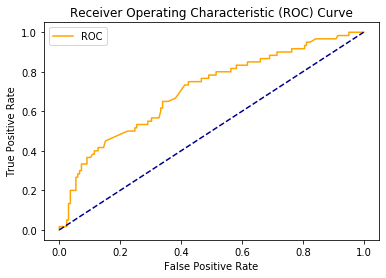

In [55]:

plot_roc_curve(fpr,tpr)

# We will treat the imbalance dataset

under-sampling is used when there is large amount of records present in the dataset where the binary with maximum value is to be sampled in such a way that it should have same number of records as other binary.

Whereas in over-sampling we increase number of samples in minority class to match with majority class

In [ ]:
!pip install imblearn

In [38]:
from imblearn.under_sampling import NearMiss
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=42)
X_balanced,y_balanced = ros.fit_sample(X_train,y_train)

In [39]:
X_balanced.shape,y_balanced.shape

((810, 4), (810,))

In [33]:
Classifier = LogisticRegression()

In [34]:
Classifier.fit(X_balanced,y_balanced)

LogisticRegression()

In [35]:
classifier_pred = Classifier.predict(X_test)

In [36]:
print(confusion_matrix(y_test,classifier_pred))
print(accuracy_score(y_test,classifier_pred))
print(classification_report(y_test,classifier_pred))

[[99 66]
 [13 47]]
0.6488888888888888
              precision    recall  f1-score   support

           0       0.88      0.60      0.71       165
           1       0.42      0.78      0.54        60

    accuracy                           0.65       225
   macro avg       0.65      0.69      0.63       225
weighted avg       0.76      0.65      0.67       225



In [37]:
from sklearn.ensemble import RandomForestClassifier

In [40]:
randomforestclassifier = RandomForestClassifier()
randomforestclassifier.fit(X_balanced,y_balanced)

RandomForestClassifier()

In [41]:
randomforestclassifier_predict = randomforestclassifier.predict(X_test)

In [42]:
print(confusion_matrix(y_test,randomforestclassifier_predict))
print(accuracy_score(y_test,randomforestclassifier_predict))
print(classification_report(y_test,randomforestclassifier_predict))

[[141  24]
 [ 38  22]]
0.7244444444444444
              precision    recall  f1-score   support

           0       0.79      0.85      0.82       165
           1       0.48      0.37      0.42        60

    accuracy                           0.72       225
   macro avg       0.63      0.61      0.62       225
weighted avg       0.71      0.72      0.71       225



In [ ]:
from sklearn.metrics import roc_curve, auc

In [ ]:
# false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test,Y_pred)
# roc_auc = auc(false_positive_rate, true_positive_rate)

In [ ]:
# plt.title('ROC')
# plt.plot(false_positive_rate, true_positive_rate, c='navy')
# plt.plot([0,1],[0,1], color='lightgrey', linestyle='--')
# plt.xlim([-0.05,1.0])
# plt.ylim([0.0,1.05])
# plt.ylabel('True Positive Rate')
# plt.xlabel('False Positive Rate')

In [ ]:
# roc_auc